In [1]:
print('野野野野野')

野野野野野


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('staroutput19.csv')
df.head()

,Unnamed: 0,SPENDMONEY,SPENDTIMES
0,0,9354,193
1,1,500,10
2,2,1409,29
3,3,5627,115
4,4,3154,68


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,SPENDMONEY,SPENDTIMES
0,9354,193
1,500,10
2,1409,29
3,5627,115
4,3154,68


In [4]:
df['SPENDMONEY'].describe()

count    10000.000000
mean      5320.961600
std       7765.140651
min        150.000000
25%        650.000000
50%       1747.500000
75%       6996.000000
max      74396.000000
Name: SPENDMONEY, dtype: float64

In [5]:
def status(x):
    return pd.Series([x.mean(),x.std(),x.min(),x.quantile(.25),x.median()
                      ,x.quantile(.75),x.max()],index=['平均值','標準差',
                        '最小值','第一四分位距','中位数','第三四分位距','最大值'])

d1 = pd.DataFrame(status(df['SPENDMONEY']))
d1


,0
平均值,5320.961600
標準差,7765.140651
最小值,150.000000
第一四分位距,650.000000
中位数,1747.500000
第三四分位距,6996.000000
最大值,74396.000000


In [7]:
S=pd.Series(df['SPENDMONEY'])
S[~((S-S.mean()).abs()>1.96*S.std())].mean()#去掉極端值的新平均值

3862.5130545531733

In [8]:
len(S[~((S-S.mean()).abs()>1.96*S.std())]) #去掉極端值的數量

9422

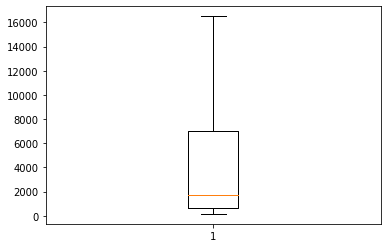

In [9]:
plt.boxplot(df['SPENDMONEY'], showfliers=False) #此處的去離群值是用IQR，並非標準差
plt.show()

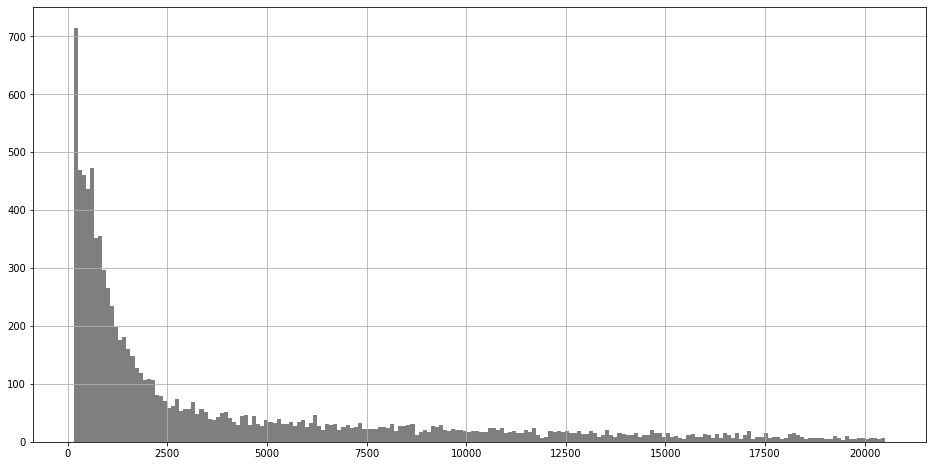

In [12]:
plt.figure(figsize=(16,8))
S[~((S-S.mean()).abs()>1.96*S.std())].hist(color='k', alpha=0.5, bins=100);

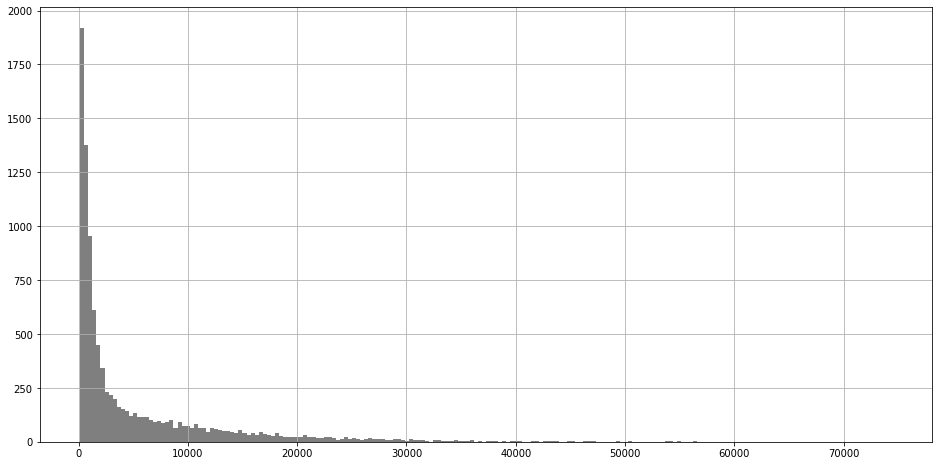

In [11]:
plt.figure(figsize=(16,8))
df['SPENDMONEY'].hist(color='k', alpha=0.5, bins=200);